# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [ ]:
!pip install opencv-python ultralytics

## Load the YOLO Model

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [ ]:
import cv2
from ultralytics import YOLO, solutions

In [ ]:
model = YOLO('YOLO_Model.pt')

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [ ]:
cap = cv2.VideoCapture('/content/YOLO_Video.mp4')
assert cap.isOpened(), 'Can not open video'

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [ ]:
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [ ]:
video_writer = cv2.VideoWriter('Vehicles_counting_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.

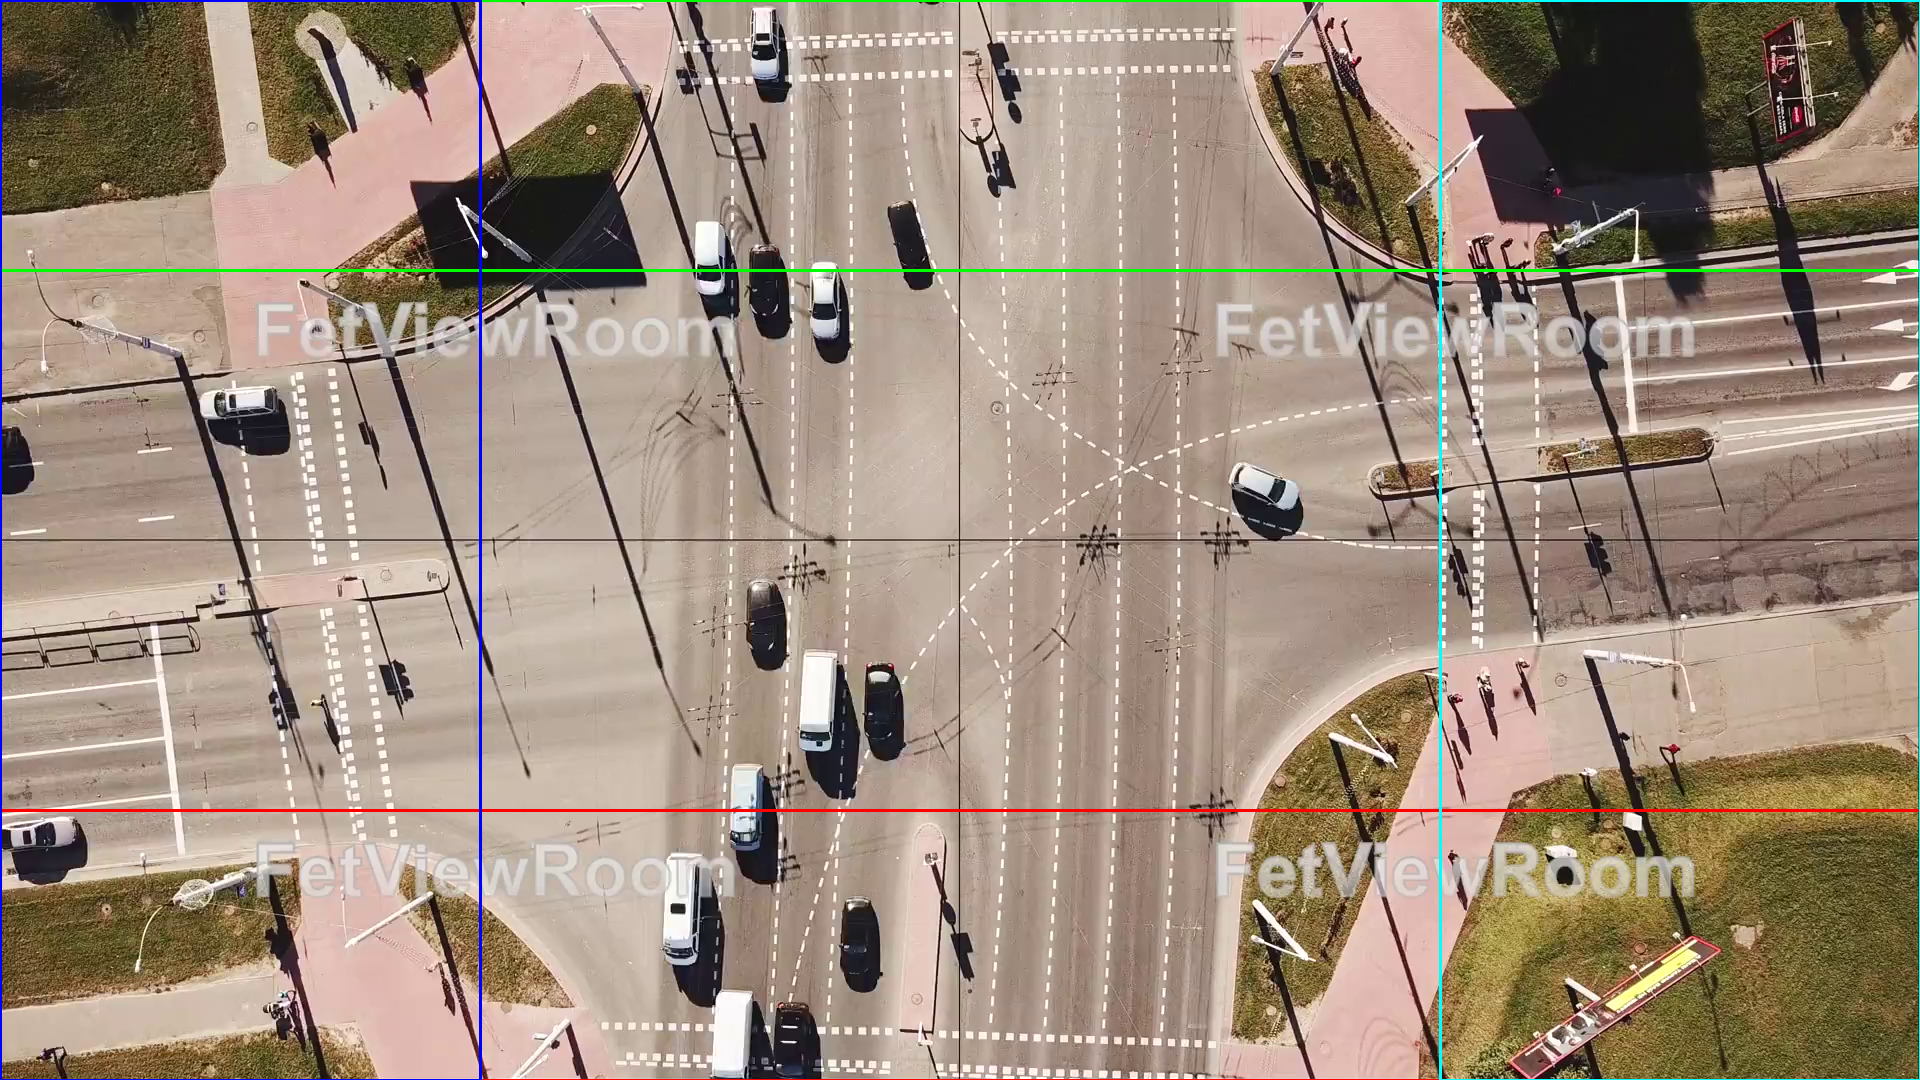

In [ ]:
x1_top, y1_top = 0, 0
x2_top, y2_top = w, h // 4


x1_bottom, y1_bottom = 0, 3 * h // 4
x2_bottom, y2_bottom = w, h


x1_left, y1_left = 0, 0
x2_left, y2_left = w // 4, h

x1_right, y1_right = 3 * w // 4, 0
x2_right, y2_right = w, h

# Visualize these ROIs by drawing rectangles on a frame of the video
frame = cap.read()[1]
cv2.rectangle(frame, (x1_top, y1_top), (x2_top, y2_top), (0, 255, 0), 2)
cv2.rectangle(frame, (x1_bottom, y1_bottom), (x2_bottom, y2_bottom), (0, 0, 255), 2)
cv2.rectangle(frame, (x1_left, y1_left), (x2_left, y2_left), (255, 0, 0), 2)
cv2.rectangle(frame, (x1_right, y1_right), (x2_right, y2_right), (255, 255, 0), 2)


from google.colab.patches import cv2_imshow
cv2_imshow(frame)


## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [ ]:
# Define region points
region_points = [(500, 800), (1080, 900), (1080, 360), (500, 360)]



counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=region_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Polygon Counter Initiated.


In [ ]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

cv2.putText(frame, "AMRO", (w - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)



0: 384x640 12 cars, 63.9ms
Speed: 2.8ms preprocess, 63.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 48.8ms
Speed: 2.6ms preprocess, 48.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 1 truck, 39.3ms
Speed: 3.1ms preprocess, 39.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 39.0ms
Speed: 2.7ms preprocess, 39.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 38.9ms
Speed: 2.8ms preprocess, 38.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 39.0ms
Speed: 3.0ms preprocess, 39.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 39.7ms
Speed: 5.0ms preprocess, 39.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 40.1ms
Speed: 3.9ms preprocess, 40.1ms inference, 1.9ms postprocess per image at shape (1, 3, 3

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 13,  46,  57],
        ...,
        [ 17,  41,  44],
        [ 16,  40,  43],
        [255, 255,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [ 21,  56,  85],
        ...,
        [ 66, 111, 125],
        [  0,  38,  52],
        [255, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 24,  59,  88],
        ...,
        [ 66, 112, 123],
        [ 10,  56,  67],
        [255, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [255, 255,   0]]

## Save and Submit Your Work

Submit both the notebook and the output video

# **Resourses** :

1 - https://stackoverflow.com/questions/67349410/how-to-draw-filled-rectangle-to-every-frame-of-video-by-using-opencv-python